# CatBoost

## Подготовка инструментов

### Установка CatBoost

In [53]:
# !pip install catboost

### Библиотеки

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

### Импорт и распределения датасета

In [55]:
df = pd.read_csv('prepared_data.csv')

In [56]:

X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,3.0,no,1.0,1.0,Sometimes,Public_Transportation,Obesity_Type_III


In [57]:
label_encoders = {}
categorical_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

## Обучение базовой модели CatBoost

### Описание переменных и модели

In [58]:
# Список наименований категориальных признаков
cat_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Преобразование категариальных признаков в классе Pool
# и создание новых train test переменных
train_pool = Pool(X_train, y_train, cat_features=cat_features)
test_pool = Pool(X_test, y_test, cat_features=cat_features)

# Инициализация модели
cbreg = CatBoostClassifier(
    iterations=1000,        # Максимум деревьев(по умолчанию 1000)
    learning_rate=0.03,     # Темп обучения (по умолчанию 0.03)
    depth=4,                # Глубина дерева (по умолчанию 4, макс 16)
    loss_function='MultiClass',   # Функция потерь
    eval_metric='Accuracy',       # Метрика для валидации
    random_seed=42,
    verbose=100             # Вывод отчета каждые 100(например) итераций
)

### Обучение и результаты

In [59]:
print("Обучение CatBoost...")

cbreg.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50,
    plot=False # Вывод в виде графика (True) или текста (False)
)

print(f"\nЛучшее качество на тесте (Accuracy): {cbreg.best_score_['validation']['Accuracy']:.4f}")
print(f"Оптимальное количество деревьев: {cbreg.tree_count_}")


Обучение CatBoost...
0:	learn: 0.5312697	test: 0.5037879	best: 0.5037879 (0)	total: 20ms	remaining: 20s
100:	learn: 0.8711308	test: 0.8181818	best: 0.8181818 (100)	total: 1.87s	remaining: 16.6s
200:	learn: 0.9128238	test: 0.8484848	best: 0.8484848 (200)	total: 3.67s	remaining: 14.6s
300:	learn: 0.9494630	test: 0.8882576	best: 0.8939394 (296)	total: 5.46s	remaining: 12.7s
400:	learn: 0.9690461	test: 0.9185606	best: 0.9185606 (399)	total: 7.79s	remaining: 11.6s
500:	learn: 0.9772584	test: 0.9280303	best: 0.9299242 (474)	total: 12.6s	remaining: 12.6s
600:	learn: 0.9804169	test: 0.9356061	best: 0.9375000 (570)	total: 16.5s	remaining: 11s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9375
bestIteration = 570

Shrink model to first 571 iterations.

Лучшее качество на тесте (Accuracy): 0.9375
Оптимальное количество деревьев: 571


### Отчет классификации

In [60]:
y_pred_num = cbreg.predict(test_pool).ravel()

classes = cbreg.classes_
y_pred = y_pred_num

label_to_int = {label_name: i for i, label_name in enumerate(classes)}
y_pred_numerical = np.array([label_to_int[label] for label in y_pred])

# Convert y_test to numerical labels using the pre-fitted LabelEncoder
y_test_numerical = label_encoders['NObeyesdad'].transform(y_test)

print(
    classification_report(
        y_test_numerical, # Use numerical y_test
        y_pred_numerical, # Use numerical predictions
        digits=4
    )
)

              precision    recall  f1-score   support

           0     0.9306    0.9853    0.9571        68
           1     0.9155    0.8333    0.8725        78
           2     0.9670    0.9362    0.9514        94
           3     0.9367    0.9867    0.9610        75
           4     1.0000    0.9873    0.9936        79
           5     0.8421    0.9014    0.8707        71
           6     0.9672    0.9365    0.9516        63

    accuracy                         0.9375       528
   macro avg     0.9370    0.9381    0.9369       528
weighted avg     0.9386    0.9375    0.9373       528



### Матрица ошибок

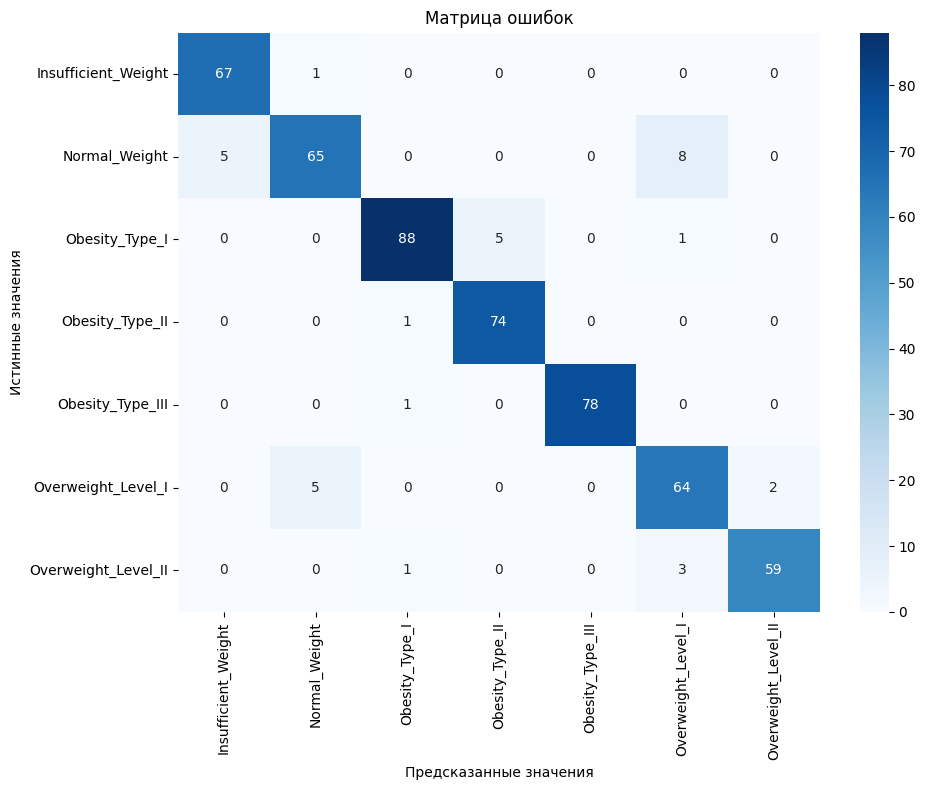

In [62]:
cm = confusion_matrix(y_test_numerical, y_pred_numerical)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['NObeyesdad'].classes_,
            yticklabels=label_encoders['NObeyesdad'].classes_)
plt.title('Матрица ошибок')
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.tight_layout()
plt.show()

### Кросс-валидация

In [64]:
full_pool = Pool(
    X,
    y,
    cat_features=cat_features
)

params = {
    'iterations':1000,
    'learning_rate':0.03,
    'depth':4,
    'loss_function':'MultiClass',
    'eval_metric':'Accuracy',
    'random_seed':42,
    'verbose':100
}

# Выполнение перекрестной проверки
cv_results = cv(full_pool, params, fold_count=5, plot=True)
print(cv_results)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 0.6387900	test: 0.6235294	best: 0.6235294 (0)	total: 26.6ms	remaining: 26.6s
100:	learn: 0.8582444	test: 0.8305882	best: 0.8305882 (91)	total: 2.96s	remaining: 26.4s
200:	learn: 0.9116251	test: 0.8752941	best: 0.8776471 (196)	total: 5.35s	remaining: 21.3s
300:	learn: 0.9430605	test: 0.9176471	best: 0.9200000 (290)	total: 7.27s	remaining: 16.9s
400:	learn: 0.9638197	test: 0.9482353	best: 0.9482353 (397)	total: 9.21s	remaining: 13.8s
500:	learn: 0.9756821	test: 0.9529412	best: 0.9529412 (499)	total: 11.2s	remaining: 11.1s
600:	learn: 0.9792408	test: 0.9623529	best: 0.9623529 (575)	total: 13s	remaining: 8.66s
700:	learn: 0.9851720	test: 0.9647059	best: 0.9647059 (694)	total: 15.9s	remaining: 6.76s
800:	learn: 0.9899170	test: 0.9623529	best: 0.9647059 (694)	total: 18.2s	remaining: 4.53s
900:	learn: 0.9905101	test: 0.9623529	best: 0.9647059 (694)	total: 20.1s	remaining: 2.21s
999:	learn: 0.9916963	test: 0.9623529	best: 0.9647059 (694)	total: 22s	remaining: 0

In [67]:
std_acc = cv_results['test-Accuracy-std'].iloc[-1]
mean_acc = cv_results['test-Accuracy-mean'].iloc[-1]

print(f'Средняя точность:{mean_acc:.4f}')
print(f'Стандартное отклонение: {std_acc:.4f}')

Средняя точность:0.9583
Стандартное отклонение: 0.0108


### Важность признаков

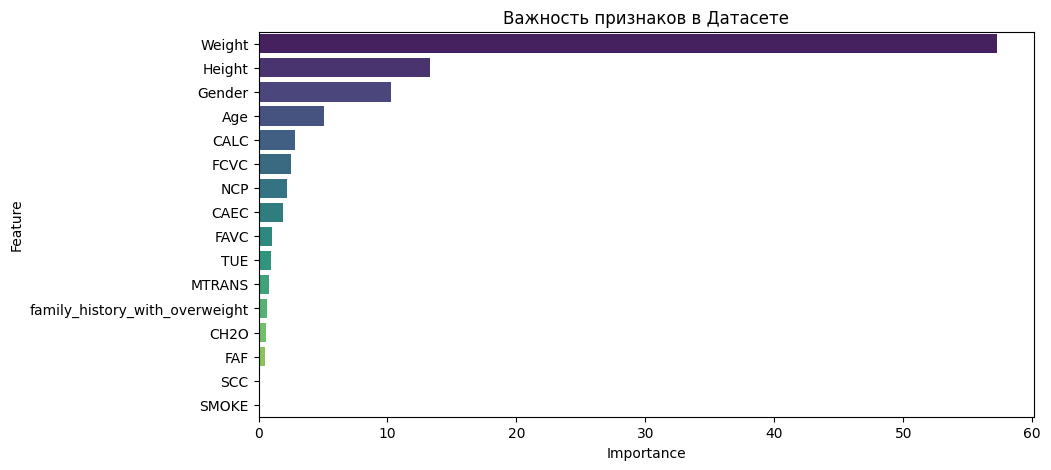

In [68]:
feature_importances = cbreg.get_feature_importance(train_pool)
feature_names = X_train.columns

# Создаем DataFrame
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Визуализация
plt.figure(figsize=(10, 5))
sns.barplot(data=fi_df, x='Importance', y='Feature', palette='viridis', hue='Feature', legend=False)
plt.title('Важность признаков в Датасете')
plt.show()

## Обучение гиперпараметрами

### Описание переменных и моделей

In [69]:
# Сетка параметров
# CatBoost чувствителен к learning_rate и l2_leaf_reg (регуляризация)
grid = {
    'learning_rate': [0.03, 0.05, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3, 5]
}

# Инициализируем "чистую" модель
model_gs = CatBoostClassifier(
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    verbose=0
)

### Вывод лучших гиперпараметров
Выполняется долго

In [70]:
print("Запуск Grid Search для CatBoost...")

grid_search_result = model_gs.grid_search(
    grid,
    train_pool,
    cv=3,
    partition_random_seed=42,
    calc_cv_statistics=True,
    search_by_train_test_split=True,
    shuffle=True,
    stratified=True,
    verbose=False
)

grid_search_result['params']

Запуск Grid Search для CatBoost...

bestTest = 0.9684542587
bestIteration = 587


bestTest = 0.9747634069
bestIteration = 714


bestTest = 0.9842271293
bestIteration = 611


bestTest = 0.9652996845
bestIteration = 772


bestTest = 0.9684542587
bestIteration = 856


bestTest = 0.9747634069
bestIteration = 844


bestTest = 0.9652996845
bestIteration = 982


bestTest = 0.9652996845
bestIteration = 863


bestTest = 0.9779179811
bestIteration = 754


bestTest = 0.9747634069
bestIteration = 770


bestTest = 0.9842271293
bestIteration = 686


bestTest = 0.9779179811
bestIteration = 180


bestTest = 0.9716088328
bestIteration = 670


bestTest = 0.9716088328
bestIteration = 572


bestTest = 0.9747634069
bestIteration = 666


bestTest = 0.9684542587
bestIteration = 681


bestTest = 0.9716088328
bestIteration = 949


bestTest = 0.9747634069
bestIteration = 551

Training on fold [0/3]

bestTest = 0.9678638941
bestIteration = 853

Training on fold [1/3]

bestTest = 0.9716446125
bestIteration = 317


{'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 1}

## Финальная модель

In [71]:
best_params = grid_search_result['params']

final_model = CatBoostClassifier(
    **best_params,
    loss_function='MultiClass',
    eval_metric='Accuracy',
    random_seed=42,
    iterations=1000,
    verbose=100
)


print(f"Начало обучения CatBoost с параметрами: {best_params}...")

final_model.fit(
    train_pool,
    eval_set=test_pool,
    early_stopping_rounds=50,
    plot=True
)

print(f"\nЛучшее качество финальной модели (Accuracy): {final_model.best_score_['validation']['Accuracy']:.4f}")
print(f"Оптимальное количество деревьев: {final_model.tree_count_}")

Начало обучения CatBoost с параметрами: {'depth': 4, 'learning_rate': 0.1, 'l2_leaf_reg': 1}...


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5312697	test: 0.5037879	best: 0.5037879 (0)	total: 26.8ms	remaining: 26.8s
100:	learn: 0.9722047	test: 0.9166667	best: 0.9166667 (98)	total: 1.88s	remaining: 16.7s
200:	learn: 0.9917877	test: 0.9431818	best: 0.9431818 (181)	total: 3.69s	remaining: 14.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.9450757576
bestIteration = 208

Shrink model to first 209 iterations.

Лучшее качество финальной модели (Accuracy): 0.9451
Оптимальное количество деревьев: 209
